# Regression Model Comparisons
In this module, we will compare OLS linear regression with the K-Nearest Neighbors (KNN) model. Linear regression is a parametric approach that assumes a linear functional form for our data, whereas KNN is a non-parametric method.

From the outset, we know of a couple advantages and disadvantages. Parametric models are great fits that give us a lot of inferential power, but they typically need a lot of assumptions about the underlying distribution of the data. Non-parametric models do not need these assumptions, but they can be a little more challenging to interpret and are prone to overfitting/underfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generate a Random Dataset

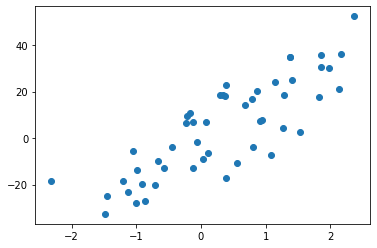

In [41]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, noise=10)

plt.scatter(X, y)
plt.show()

## OLS Regression

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

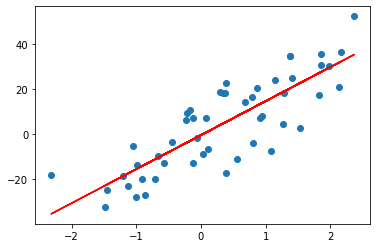

In [102]:
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color='red')

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(regressor, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.54 (+/- 0.64)
Weighted Accuracy: 0.54 (+/- 0.64)


## KNN Regression

In [104]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=10)
regressor.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

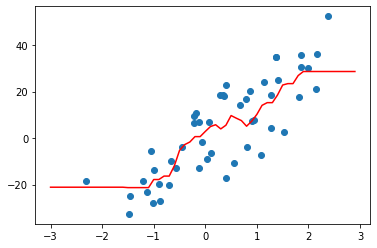

In [105]:
plt.scatter(X,y)
T = np.arange(-3, 3, 0.1)[:, np.newaxis]
plt.plot(T, regressor.predict(T), color='red')
plt.show()

In [106]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(regressor, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.50 (+/- 0.68)
Weighted Accuracy: 0.50 (+/- 0.68)


In our case, the KNN regressor actually did better than OLS, but that is because there is a large variance in our dataset and that probably did better to capture that. If we were to to test this on another dataset from the same distribution, we might run into errors again since it is likely overfitting.